## <span style="color:#7B241C"> 1 Problem Definition </span>.

>Logistic model with an imbalance target. 
## <span style="color:#7B241C"> 2 Gather Data </span>.

>We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.


**Import Libraries**

In [19]:
#!pip install imblearn

     -------------------------------------- 226.0/226.0 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [1]:
# Basic libraries
import pymysql
import pandas as pd # data manipulatioN
import numpy as np # numerical operations
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization
import warnings # warning messages management

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder # label encoding
from sklearn.model_selection import train_test_split # splitting data into train/test sets
from sklearn.linear_model import LogisticRegression # logistic model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score # logistic metrics
from sklearn import metrics # more metrics

# Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings
#%matplotlib inline


In [2]:
#Import data from the file 
data_2=pd.read_csv("files_for_lab/customer_churn.csv",sep=",") # Paste here the path. 
data_2.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5211,8382-SHQEH,Female,0,Yes,No,8,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.90,764.95,Yes
73,8028-PNXHQ,Male,0,Yes,Yes,62,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.25,1424.6,No
5330,5747-PMBSQ,Male,1,Yes,No,10,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Mailed check,92.50,934.1,Yes
3066,5652-MSDEY,Female,0,No,No,10,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.75,777.3,No
251,4629-NRXKX,Female,0,Yes,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,70.40,147.15,Yes
6275,0885-HMGPY,Male,0,No,No,62,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),69.40,4237.5,No
6396,2974-GGUXS,Female,1,Yes,No,36,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),91.95,3301.05,No
1742,5318-IXUZF,Female,0,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),87.15,183.75,Yes
3566,9677-AVKED,Female,0,No,Yes,53,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,84.60,4449.75,No
5959,2729-VNVAP,Female,0,Yes,Yes,33,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.80,641.35,No


## <span style="color:#7B241C"> 3 Pre-process Data </span>.

 
>This step has been completed in iterations together with step 4. After some analysis I was adding cleaning steps here

**Here I separate numerical and categorical features.** 
 - df_numeric
 - df_object

In [3]:
data_3=data_2
#Print info for the dataframe
print('\n\n\nDescription of output data frame \n')
data_3.info()




Description of output data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pape

In [4]:
#Standarize column names
cols = [col_name.upper().replace(' ', '_') for col_name in data_3.columns]
data_3.columns = cols

df_numeric=data_3.select_dtypes(include=["float", "int"])
df_object=data_3.select_dtypes(include=[object]) 


data_3=pd.concat([df_numeric, df_object], axis=1)
data_3.reset_index()
data_3.sample(10)

,SENIORCITIZEN,TENURE,MONTHLYCHARGES,CUSTOMERID,GENDER,PARTNER,DEPENDENTS,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,TOTALCHARGES,CHURN
2482,0,2,45.00,9588-OZDMQ,Female,Yes,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,89.75,No
6006,0,23,30.35,1360-RCYRT,Male,Yes,Yes,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),678.75,No
2818,0,29,94.65,4831-EOBFE,Male,Yes,Yes,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,No,Credit card (automatic),2649.15,Yes
4874,0,38,83.90,1193-RTSLK,Female,No,No,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),3233.6,Yes
4591,0,10,21.20,8003-EWNDZ,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,222.65,No
2803,0,43,19.65,1985-MBRYP,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),779.25,No
4122,0,53,62.85,4632-XJMEX,Male,No,Yes,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Credit card (automatic),3419.5,No
3911,0,18,49.40,0991-BRRFB,Male,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,874.8,Yes
1217,0,62,23.75,0784-GTUUK,Male,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),1446.8,No
1964,0,66,54.80,2430-RRYUW,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,Yes,Mailed check,3465.7,No


## <span style="color:#7B241C"> 4 Analyze Data </span>.

<div class="alert alert-block alert-info">
<b>info:</b> Here the results are shown for each single variable. Categorial and Numerical values are analized separately
</div>

In [5]:
df_numeric=data_3.select_dtypes(include=["float", "int"])
df_bool=data_3.select_dtypes(include=["bool"])
df_object=data_3.select_dtypes(include=[object])

In [6]:
#I dont need to do this step

## <span style="color:#7B241C"> 5 Prepare Data </span>.

>Data is prepared, tranform or encoded to apply the model. 

### Select variables relevant for the model
**Categoricals**

    
**Numericals**

    -TENURE
    -SENIORCITIZEN
    -MONTHLYCHARGES
    
 **Boolean**
      
 
 **OUR TARGET IS:**
 >CHURN    


In [7]:
Y=data_3[['CHURN']]
X=data_3[['TENURE','SENIORCITIZEN','MONTHLYCHARGES']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TENURE          7043 non-null   int64  
 1   SENIORCITIZEN   7043 non-null   int64  
 2   MONTHLYCHARGES  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


## <span style="color:#7B241C"> 6 Evaluate Models </span>

In [8]:
# We separate training and testing datasets and correspondant targets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
len(X_train)

4930

In [9]:
# We traing the training dataset using Logistic Regression 
classification = LogisticRegression(random_state=0).fit(X_train, y_train)

In [10]:
# We predict on the testing dataset
predictions = classification.predict(X_test)

In [11]:
pd.Series(predictions).value_counts()

No     1700
Yes     413
dtype: int64

In [12]:
y_test.value_counts()

CHURN
No       1547
Yes       566
dtype: int64

In [13]:
#from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1391,  156],
       [ 309,  257]], dtype=int64)

In [14]:
cm = confusion_matrix(y_test, predictions)

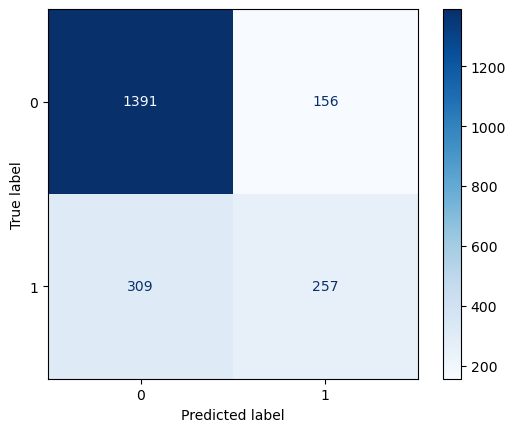

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
#disp.plot(cmap='Blues')
#sns.heatmap(cm, annot=True,fmt='g')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [16]:
# Accuracy without manipulating the sample is already 0.77
classification.score(X_test, y_test)

0.7799337434926644

**Use Smote**

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = data_3[['TENURE','SENIORCITIZEN','MONTHLYCHARGES']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = data_3[['CHURN']]
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

CHURN
No       5174
Yes      5174
dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7475040257648953

In [ ]:
#There is no improvement. Now the model works worse than before 

**Tomek link**
Downsizing the biggest group

In [23]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

CHURN
No       4697
Yes      1869
dtype: int64

In [24]:
X_tl2, y_tl2 = tl.fit_resample(X_tl, y_tl)
y_tl2.value_counts()

CHURN
No       4544
Yes      1869
dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.8040609137055837

Now the performance is better. we have removed the cases from the class with most of the cases that are close to the minority class. 